In [94]:


import pandas as pd


data0=pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/Art.csv",index_col=0)
data1=pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/Sports.csv",index_col=0)
data2=pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/Economy.csv",index_col=0)

In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
data0.head()

,Article Title,Category
0,\n\nWorks by Picasso and others stolen in Spai...,Art
1,\n\nSalwa and Maged at the Art Corner Gallery ...,Art
2,\n\nA tribute to Abdalla Gohar\n\n\n\nOn 1 Dec...,Art
3,"\n\nRaw, untamed, and compelling: ‘Flesh’ by S...",Art
4,\n\nFrom water to mosaics\n\n\n\nThe Gezira Ce...,Art


In [97]:
data0.isna().sum()

,0
Article Title,0
Category,0


In [98]:
data1.head()

,Article Title,Category
0,\n\nFans in shock after Leicester City helicop...,sports
1,\n\nLeicester City football club owner was on ...,sports
2,\n\nLeicester City football club owner's helic...,sports
3,\n\nRonaldo scores twice as Juve overcome frig...,sports
4,\n\nKlopp hails Liverpool's '20-point win' ove...,sports


In [99]:
data1.isna().sum()

,0
Article Title,0
Category,0


In [100]:
data2.head()

,Article Title,Category
0,"\n\nChinese demand, Mideast turmoil boost ship...",economy
1,\n\nEgypt government to issue LE1 bn in zero c...,economy
2,\n\nFirst Egyptian Samsung factory starts prod...,economy
3,\n\nUPDATED: Egyptian and Arab stocks soar as ...,economy
4,\n\nGreek high school teachers to strike over ...,economy


In [101]:
total_data=pd.concat([data0,data1,data2])

total_data

,Article Title,Category
0,\n\nWorks by Picasso and others stolen in Spai...,Art
1,\n\nSalwa and Maged at the Art Corner Gallery ...,Art
2,\n\nA tribute to Abdalla Gohar\n\n\n\nOn 1 Dec...,Art
3,"\n\nRaw, untamed, and compelling: ‘Flesh’ by S...",Art
4,\n\nFrom water to mosaics\n\n\n\nThe Gezira Ce...,Art
...,...,...
9975,Egypt imposes three-month export ban on cookin...,economy
9976,"Egypt bans export of wheat, other staples for ...",economy
9977,"Egypt’s annual inflation hit 10% in February, ...",economy
9978,INTERVIEW: EBRD supports Egypt’s green transfo...,economy


In [102]:
total_data.isna().sum()

,0
Article Title,0
Category,0


In [103]:
total_data=total_data[["Article Title","Category"]]

<Axes: >

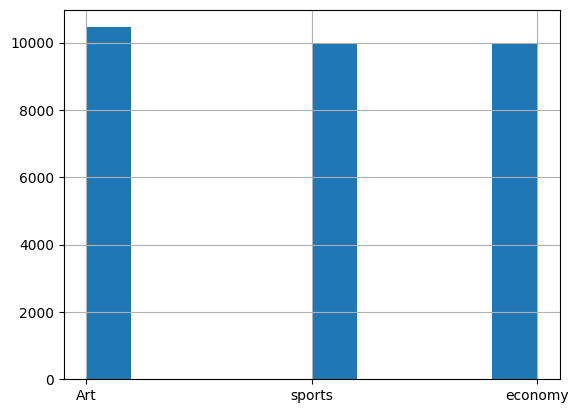

In [104]:
total_data["Category"].hist()

In [105]:
import re



def clean(text):

    text=re.sub(r"\d+","",text)

    text=text.lower()
    text=re.sub(r"[^\w\s+]","",text)
    text=re.sub(r"\n","",text)
    return text



total_data["Article Title"]=total_data["Article Title"].apply(clean)

In [106]:
total_data["Article Title"]

,Article Title
0,works by picasso and others stolen in spain pi...
1,salwa and maged at the art corner gallery exhi...
2,a tribute to abdalla goharon december khan al...
3,raw untamed and compelling flesh by samir foua...
4,from water to mosaicsthe gezira centre for mod...
...,...
9975,egypt imposes threemonth export ban on cooking...
9976,egypt bans export of wheat other staples for ...
9977,egypts annual inflation hit in february the h...
9978,interview ebrd supports egypts green transform...


In [107]:
label=total_data["Category"].unique()
label

array(['Art', 'sports', 'economy'], dtype=object)

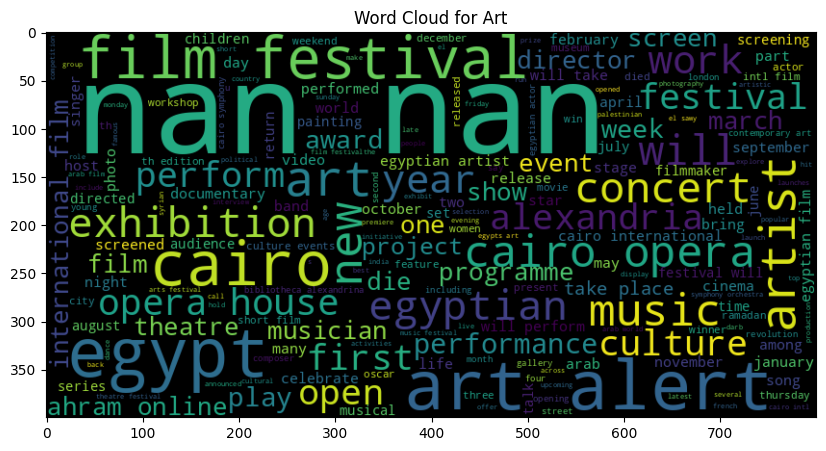

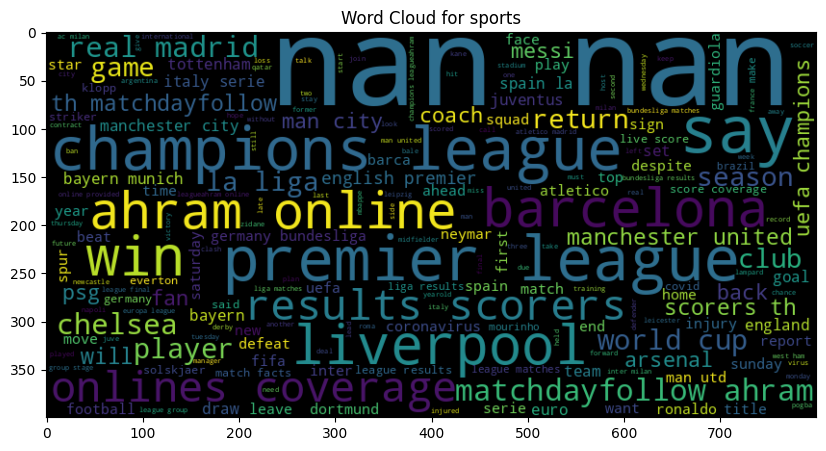

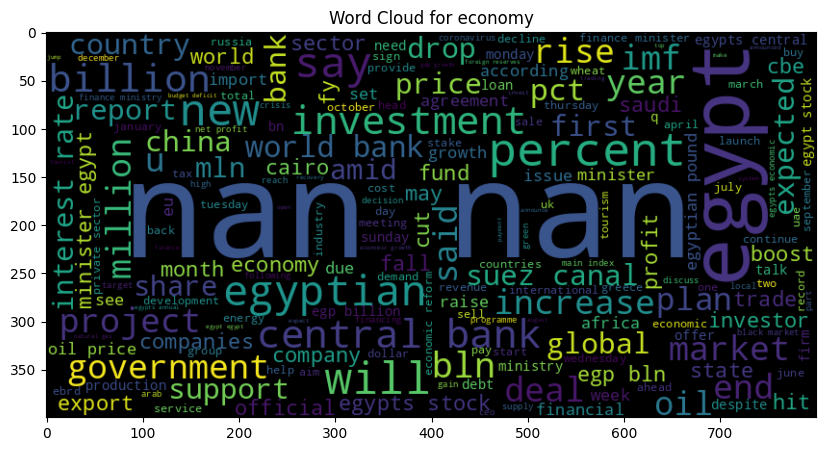

In [108]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt


for i in label:
  # Concatenate all the words into a single string
  text = ' '.join((total_data["Article Title"].where(total_data["Category"]==f"{i}")).astype(str).tolist())

  # Generate the word cloud
  wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

  # Display the word cloud
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('on')
  plt.title(f'Word Cloud for {i}')
plt.show()

In [109]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

def tokenize(text):
    tok=word_tokenize(text)

    return tok


total_data["Article Title"]=total_data["Article Title"].apply(tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [110]:
total_data["Article Title"]

,Article Title
0,"[works, by, picasso, and, others, stolen, in, ..."
1,"[salwa, and, maged, at, the, art, corner, gall..."
2,"[a, tribute, to, abdalla, goharon, december, k..."
3,"[raw, untamed, and, compelling, flesh, by, sam..."
4,"[from, water, to, mosaicsthe, gezira, centre, ..."
...,...
9975,"[egypt, imposes, threemonth, export, ban, on, ..."
9976,"[egypt, bans, export, of, wheat, other, staple..."
9977,"[egypts, annual, inflation, hit, in, february,..."
9978,"[interview, ebrd, supports, egypts, green, tra..."


In [111]:

# remove the stop words from strings


from nltk.corpus import stopwords
nltk.download('stopwords')

stop=stopwords.words("english")


def remove_stop_words(text):

    return [i for i in text if i not in stop]


total_data["Article Title"]=total_data["Article Title"].apply(remove_stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [112]:
# put the words in the orignal maening

from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

limit=WordNetLemmatizer()

def limitization(text):

    return " ".join([limit.lemmatize(i) for i in text])

total_data["Article Title"]=total_data["Article Title"].apply(limitization)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [113]:
# Encoding the label

from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()

total_data["Category"]=label_encoder.fit_transform(total_data["Category"])

total_data["Category"]=total_data["Category"].values.reshape(-1,1)
total_data["Category"]

,Category
0,0
1,0
2,0
3,0
4,0
...,...
9975,1
9976,1
9977,1
9978,1


In [114]:
# Assume 'data' is your DataFrame
total_data = total_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the first few rows of the shuffled DataFrame
print(total_data.head())

                                       Article Title  Category
0  photo ice instrument melt musical boundary ita...         0
1  spain defender sergio ramos join psg year cont...         2
2     egypt trade deficit slows pct yearonyear april         1
3  dina elwedidi mazaher ensemble perform norwayd...         0
4  luxor african film festival request submission...         0


In [115]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(total_data["Article Title"],total_data["Category"],test_size=0.2,random_state=42,shuffle=True)

In [116]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize the text
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(x_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(x_train)
X_test_seq = tokenizer.texts_to_sequences(x_test)
print(X_train_seq)
# Pad the sequences
max_len = 100  # You can adjust this length
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

# Print shapes of the padded sequences
print(X_train_pad.shape, X_test_pad.shape)


[[154, 118, 167, 65, 87, 306, 101, 31, 84, 53, 154, 118, 167, 20, 213], [116, 95, 4, 385, 48, 644, 1, 27, 151, 1598, 740, 1, 385, 1565], [4292, 4293, 1, 63, 414, 1849, 766, 3560, 9, 1, 137, 4292, 4293, 3379, 63, 414, 1849, 623, 766, 3560, 148, 306, 4622, 2902, 1426, 695, 34, 208, 9, 827, 142, 161], [770, 2903, 76, 1970, 203, 1850, 1, 203, 1, 1850, 1, 237, 1, 41], [307, 553, 1, 1006, 1, 55], [476, 735, 639, 9, 389, 510, 1299, 918, 1668], [3, 246, 214, 4294, 128, 110, 62, 161, 1503], [3380, 1918, 604, 59, 115, 239], [2, 1, 343, 58, 852, 146, 134, 42, 17, 1, 613, 282, 897, 1, 1, 145, 3381, 1, 3561, 159, 1141, 348, 134, 1533, 703, 2098, 2, 1669], [3, 434, 1, 3044, 1211, 1, 1, 9, 189, 1, 68, 898, 3, 434, 190, 247, 4623, 67, 252, 3207, 265, 419, 1670, 5], [490, 99, 1, 2904, 2099, 2039, 944, 2100, 2298], [98, 4624, 52, 649, 22, 8, 1, 36, 1971], [177, 1534, 130, 3382, 420, 718, 127, 4625, 1142], [2905, 102, 919, 3208, 1, 443], [1, 291, 2906, 1, 2, 3209, 586, 741, 366], [1798, 1, 191, 423, 292,

In [117]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout,SimpleRNN

# Define the LSTM model
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=max_len),
    SimpleRNN(128),  # Remove return_sequences=True
    Dropout(0.2),

    Dense(3, activation='softmax')  # Assuming 3 classes: positive, neutral, negative
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_11 (SimpleRNN)            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [118]:
# Train the LSTM model
history = model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test))


Epoch 1/5
381/381 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.7030 - loss: 0.6637 - val_accuracy: 0.9382 - val_loss: 0.2029
Epoch 2/5
381/381 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9427 - loss: 0.1904 - val_accuracy: 0.5532 - val_loss: 0.9231
Epoch 3/5
381/381 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.6754 - loss: 0.7775 - val_accuracy: 0.7682 - val_loss: 0.6381
Epoch 4/5
381/381 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.8267 - loss: 0.4986 - val_accuracy: 0.8298 - val_loss: 0.4820
Epoch 5/5
381/381 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.8674 - loss: 0.3914 - val_accuracy: 0.8476 - val_loss: 0.4397


191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8422 - loss: 0.4438
Test Accuracy: 0.85


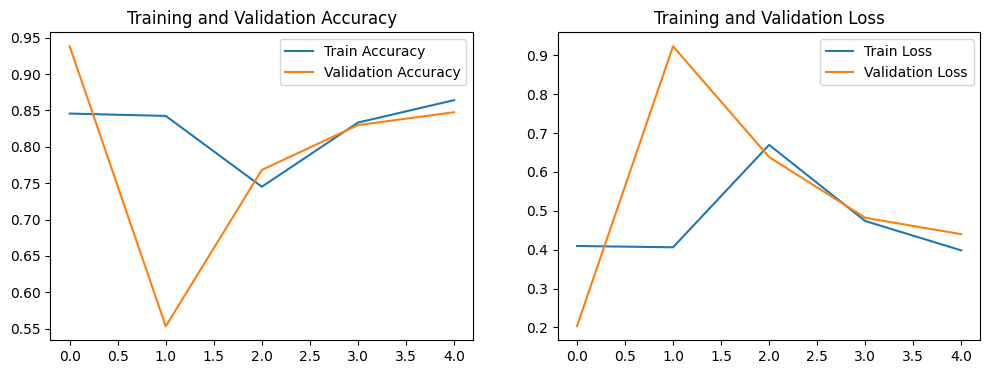

In [119]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_pad, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')

# Plot training and validation accuracy and loss
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()
